In [1007]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import argparse

In [1008]:
# 设置出版级绘图风格
plt.rcParams.update({
    "font.size": 14,                 # 全局字号
    "axes.titlesize": 16,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
    "xtick.direction": "in",         # 刻度朝内
    "ytick.direction": "in",
    "lines.linewidth": 2,
    "lines.markersize": 6,
    "figure.figsize": (6, 5),        # 图片默认大小
    # "mathtext.fontset": "cm"         # 数学公式使用 Computer Modern 字体
})

In [1009]:
# # 设置绘图风格
# import matplotlib as mpl
# mpl.rcParams['font.family'] = 'sans-serif'
# mpl.rcParams['axes.linewidth'] = 1.5
# mpl.rcParams['xtick.major.width'] = 1.5
# mpl.rcParams['ytick.major.width'] = 1.5
# mpl.rcParams['font.size'] = 12

In [1010]:
L = 24
J = 0.8
W = 1.0
n_imp = 0.05
mu = -1.08
T=1000.0

data_dir = f"../data/T_scan_L{L}_J{J}_W{W}_imp{n_imp}_mu_{mu}/T_{T}" 

In [1011]:
data_dir = "../data/test_output_L24_J0.8_W1.0_imp0.0_T0.0001_mu-1.4"

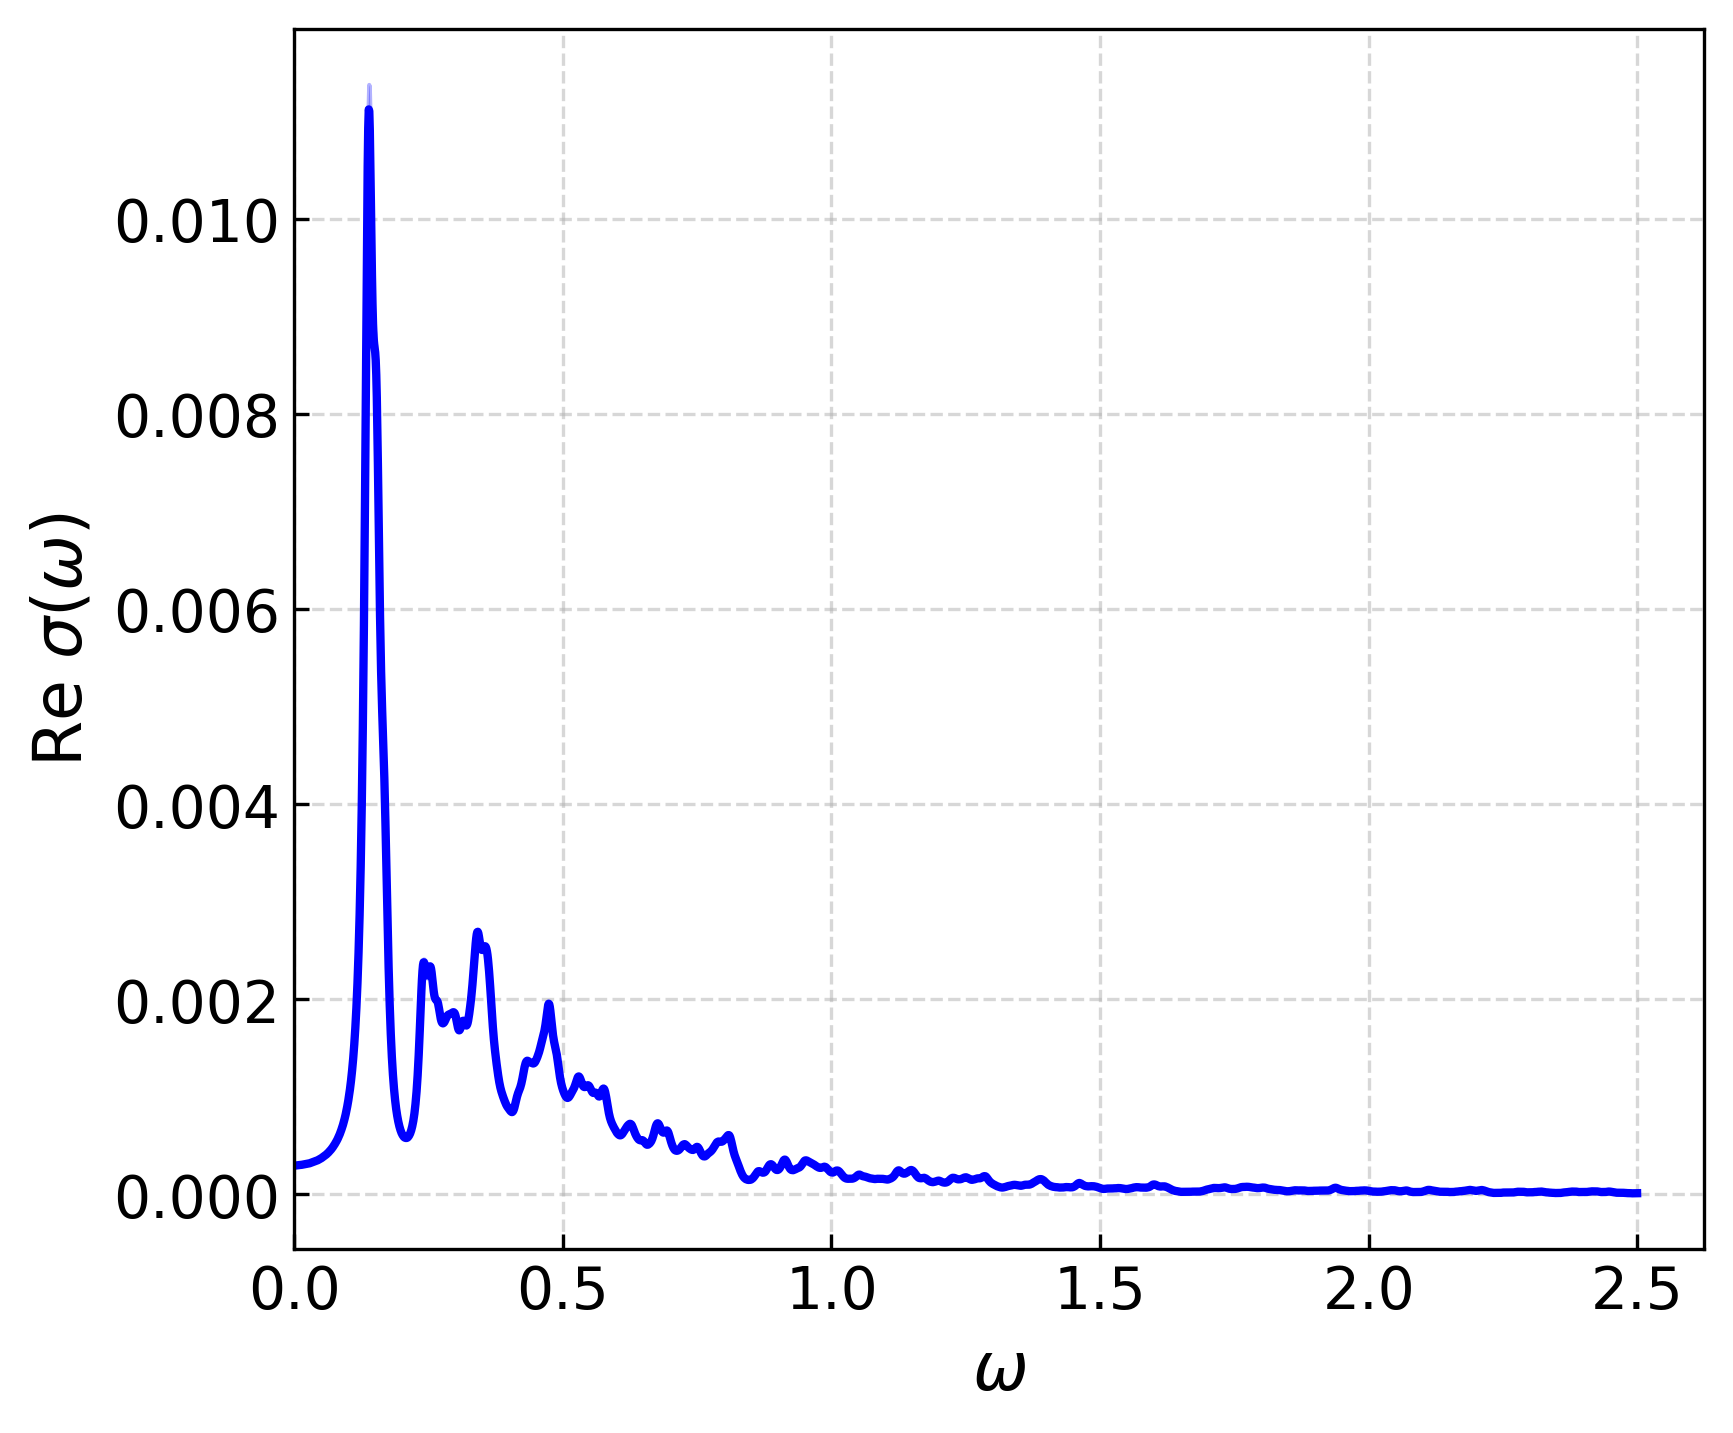

In [1012]:
# 1. Optical Conductivity
opt_file = os.path.join(data_dir, "processed_opt_cond.csv")

df_opt = pd.read_csv(opt_file)

plt.figure(figsize=(6, 5), dpi=300)
plt.plot(df_opt['omega'], df_opt['Re_Sigma'], 'b-', label=r'Re $\sigma(\omega)$')
plt.fill_between(df_opt['omega'], 
                    df_opt['Re_Sigma'] - df_opt['Error'], 
                    df_opt['Re_Sigma'] + df_opt['Error'], 
                    color='b', alpha=0.3)

plt.xlabel(r'$\omega$')
plt.ylabel(r'Re $\sigma(\omega)$')
# plt.title('Optical Conductivity')
plt.xlim(left=0)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
# plt.savefig(os.path.join(data_dir, "plot_opt_cond.png"), dpi=300)
plt.show()

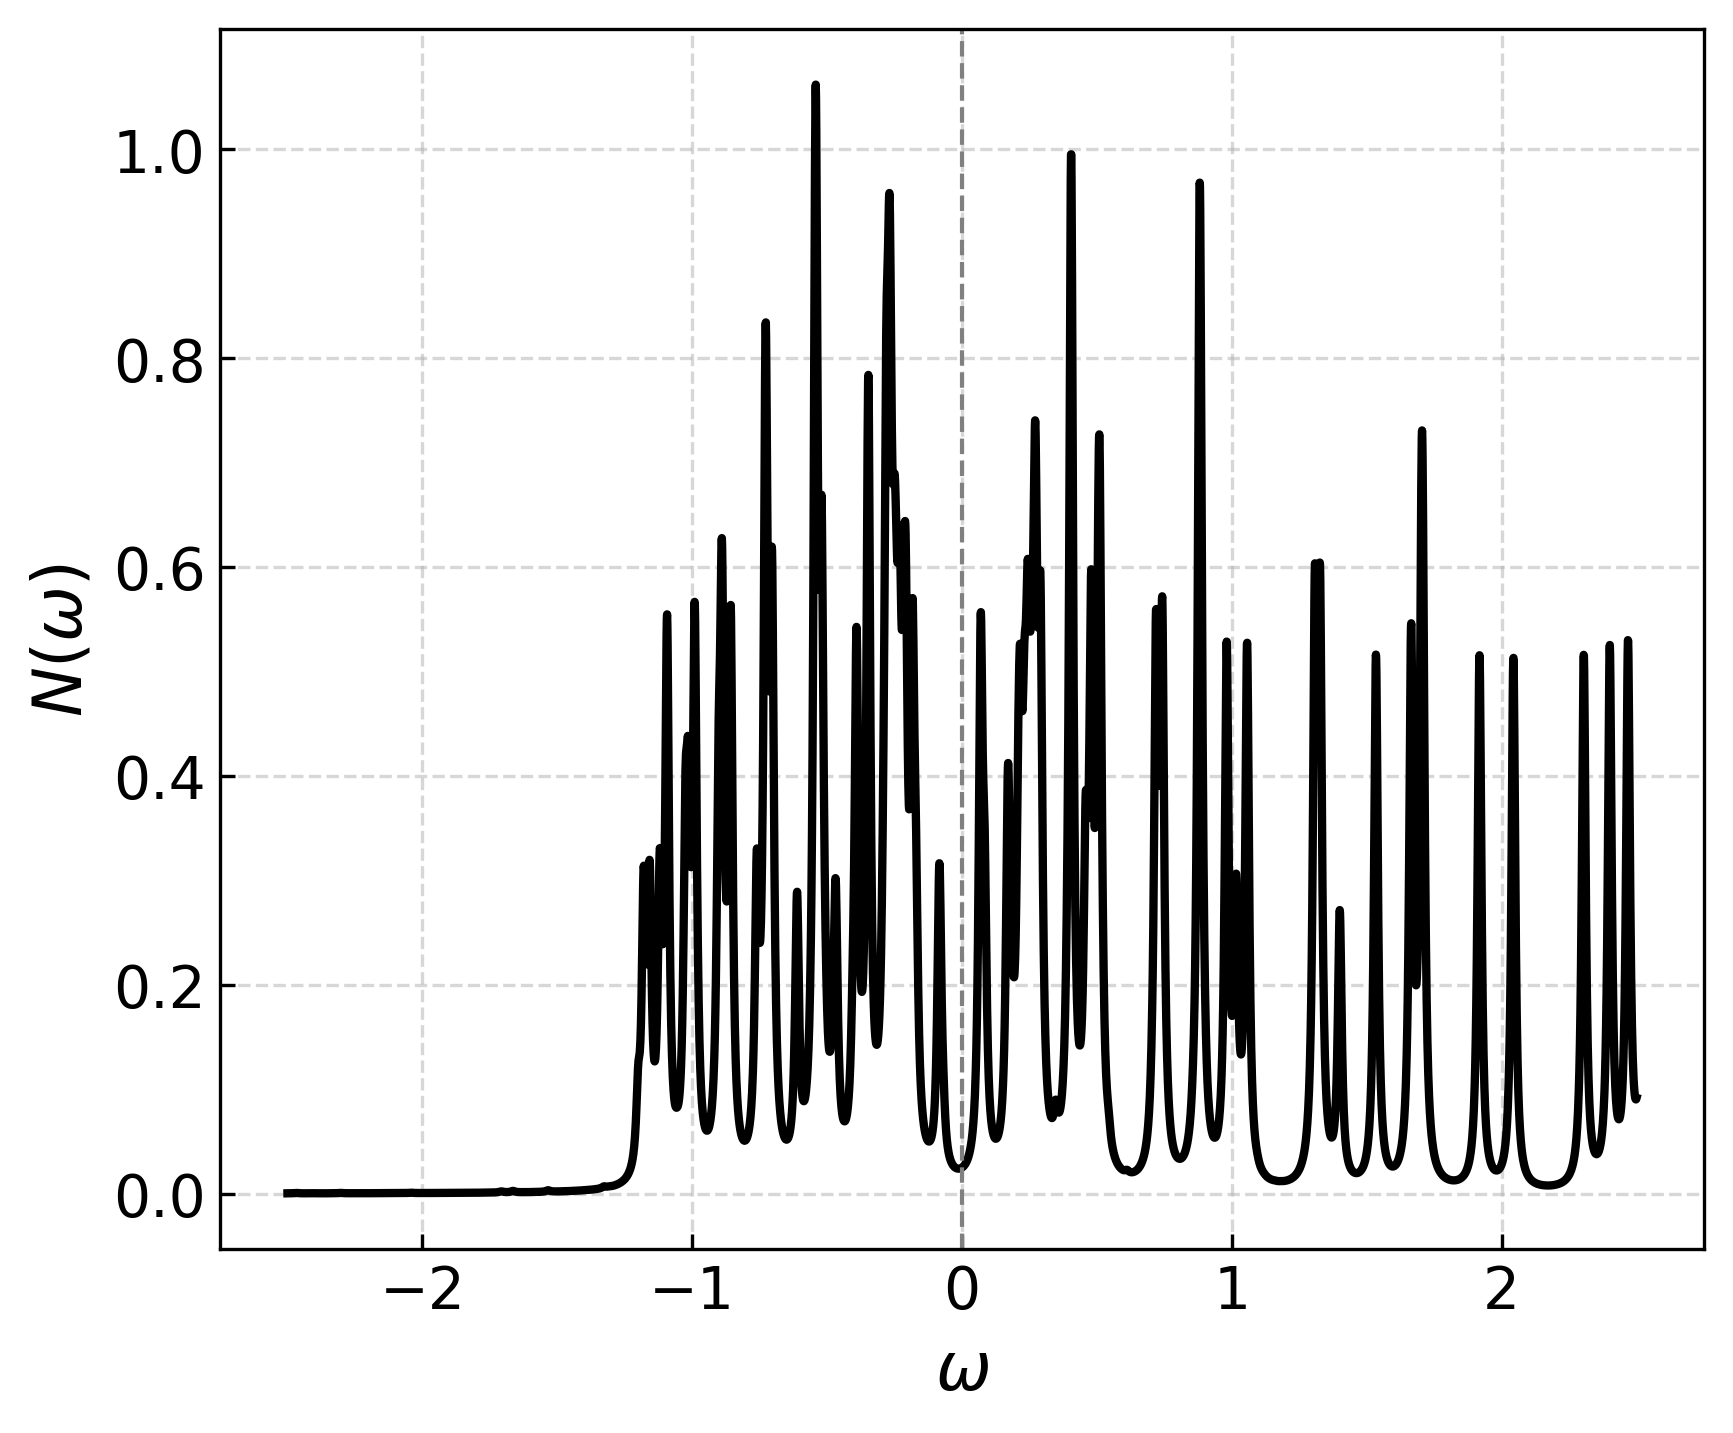

In [1013]:
# 2. DOS
dos_file = os.path.join(data_dir, "processed_dos.csv")

df_dos = pd.read_csv(dos_file)

plt.figure(figsize=(6, 5), dpi=300)
plt.plot(df_dos['omega'], df_dos['DOS'], 'k-', label=r'$N(\omega)$')
plt.fill_between(df_dos['omega'], 
                    df_dos['DOS'] - df_dos['Error'], 
                    df_dos['DOS'] + df_dos['Error'], 
                    color='k', alpha=0.3)

plt.xlabel(r'$\omega$')
plt.ylabel(r'$N(\omega)$')
# plt.xlim(-0.5, 0.5)
# plt.title('Density of States')
# 画一条竖线在 omega=0
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
# plt.savefig(os.path.join(data_dir, "plot_dos.png"), dpi=300)
plt.show()

In [1014]:
# Delta = 0.1165
# tp = -0.35
# mu = -1.4

Delta = 0.092
tp = -0.35
mu = -1.08

In [1015]:
Delta_k = Delta * 2
epsilon_k = 4*tp - mu
E_k = np.sqrt(epsilon_k**2 + Delta_k**2)
u_k2 = 0.5 * (1 + epsilon_k / E_k)
v_k2 = 0.5 * (1 - epsilon_k / E_k)

In [1016]:
eta = 5 / 24**2
delta_peak = 1/(np.pi*eta)

u_peak = u_k2 * delta_peak
v_peak = v_k2 * delta_peak

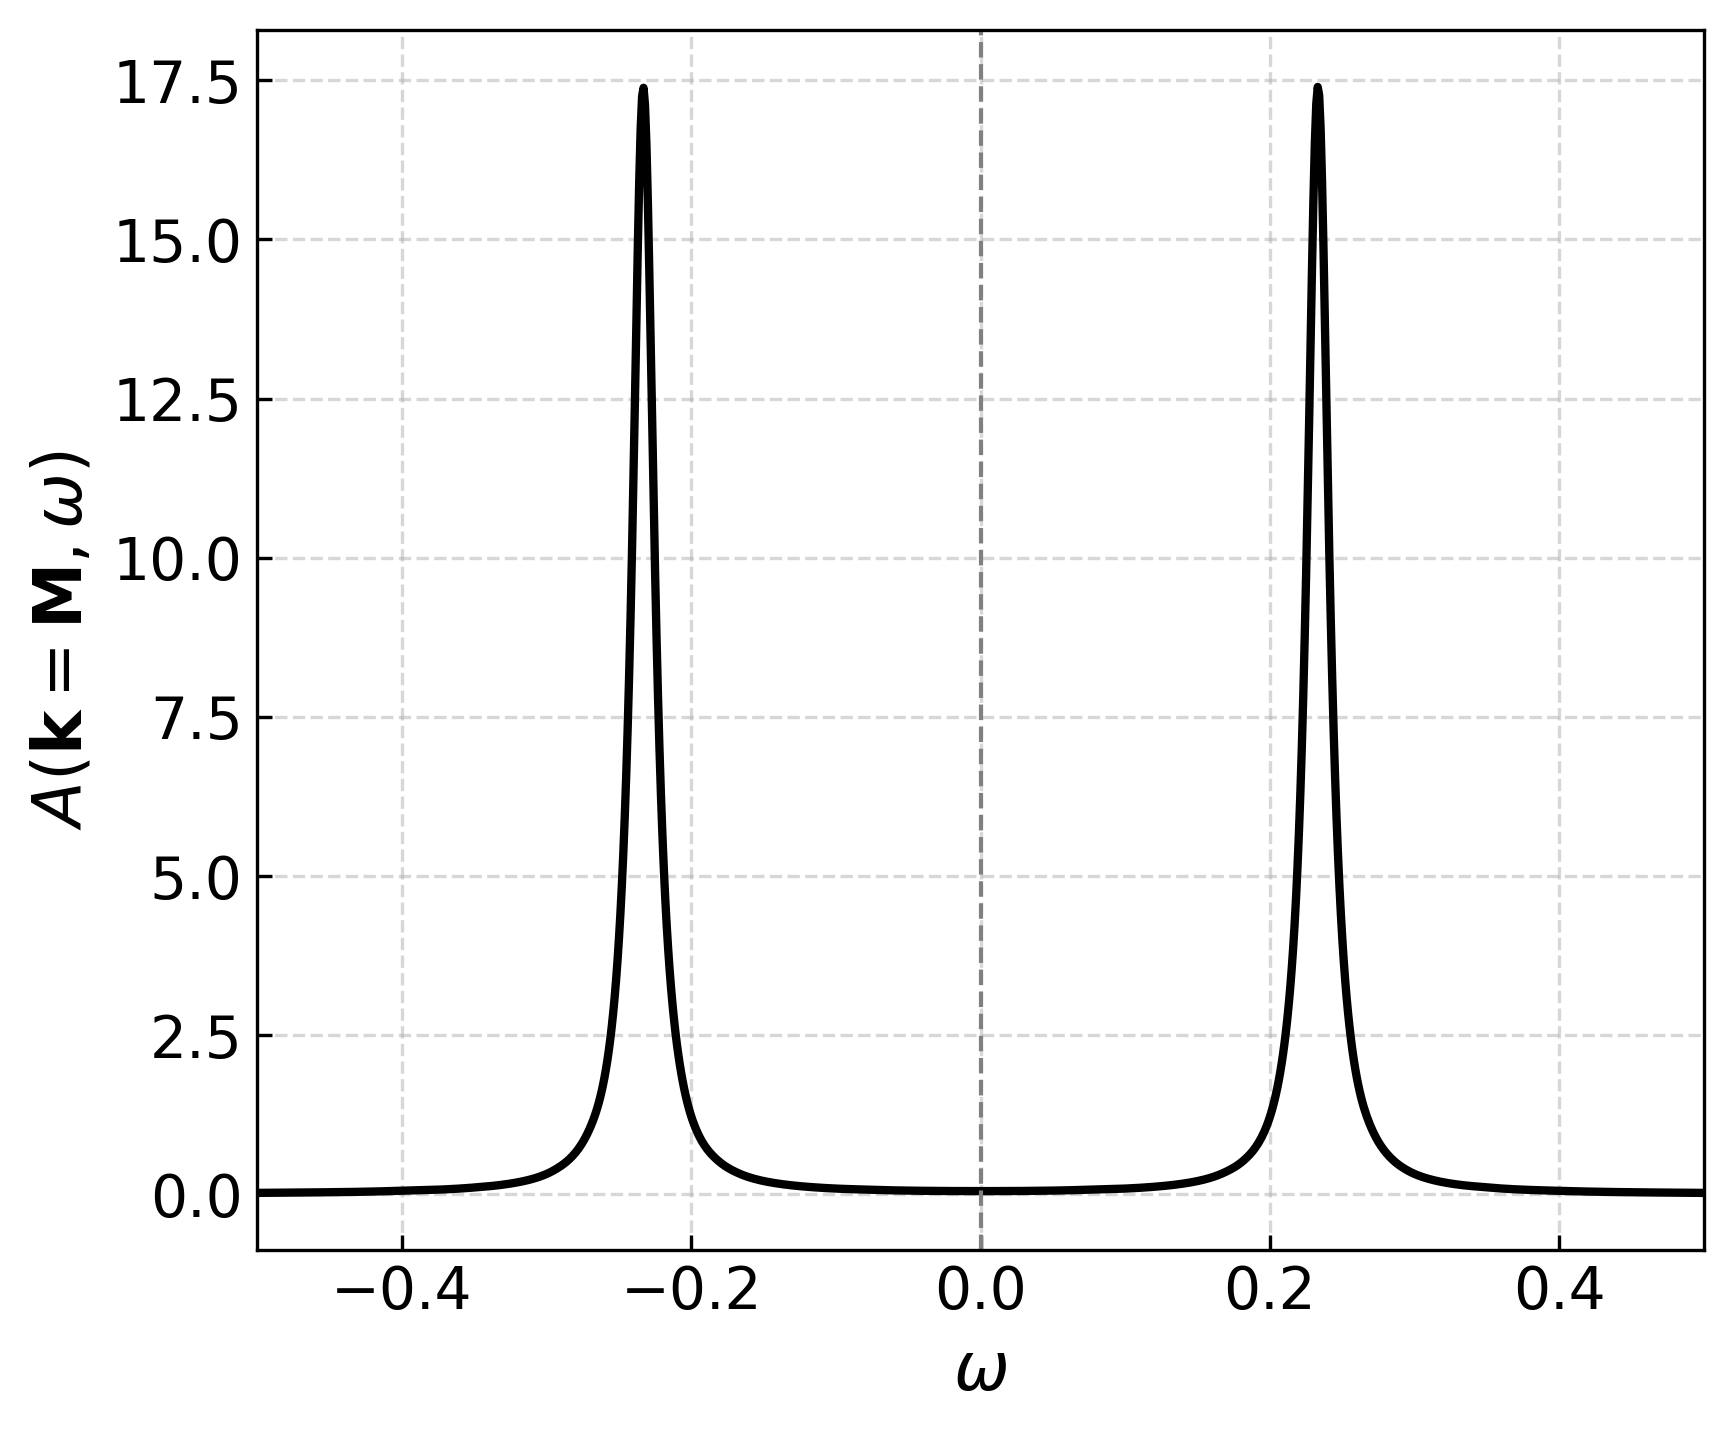

In [1017]:
# 2. DOS
dos_file = os.path.join(data_dir, "processed_dos_AN.csv")

df_dos = pd.read_csv(dos_file)

plt.figure(figsize=(6, 5), dpi=300)
plt.plot(df_dos['omega'], df_dos['DOS_AN'], 'k-')
plt.fill_between(df_dos['omega'], 
                    df_dos['DOS_AN'] - df_dos['Error'], 
                    df_dos['DOS_AN'] + df_dos['Error'], 
                    color='k', alpha=0.3)

plt.xlabel(r'$\omega$')
plt.ylabel(r'$A(\mathbf{k}=\mathbf{M},\omega)$')
plt.xlim(-0.5, 0.5)
# plt.yscale('log')
# plt.title('Density of States')
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
# plt.axvline(E_k, color='red', linestyle='--', linewidth=1, label=r'$+E_k$')
# plt.axvline(-E_k, color='blue', linestyle='--', linewidth=1, label=r'$-E_k$')
# plt.axhline(u_peak, color='red', linestyle=':', linewidth=1, label=r'$u_k^2/\pi\eta$')
# plt.axhline(v_peak, color='blue', linestyle=':', linewidth=1, label=r'$v_k^2/\pi\eta$')
# plt.axhline(delta_peak/2, color='green', linestyle=':', linewidth=1, label=r'$1/(2\pi\eta)$')
# plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
# plt.savefig(os.path.join(data_dir, "plot_dos.png"), dpi=300)
plt.show()

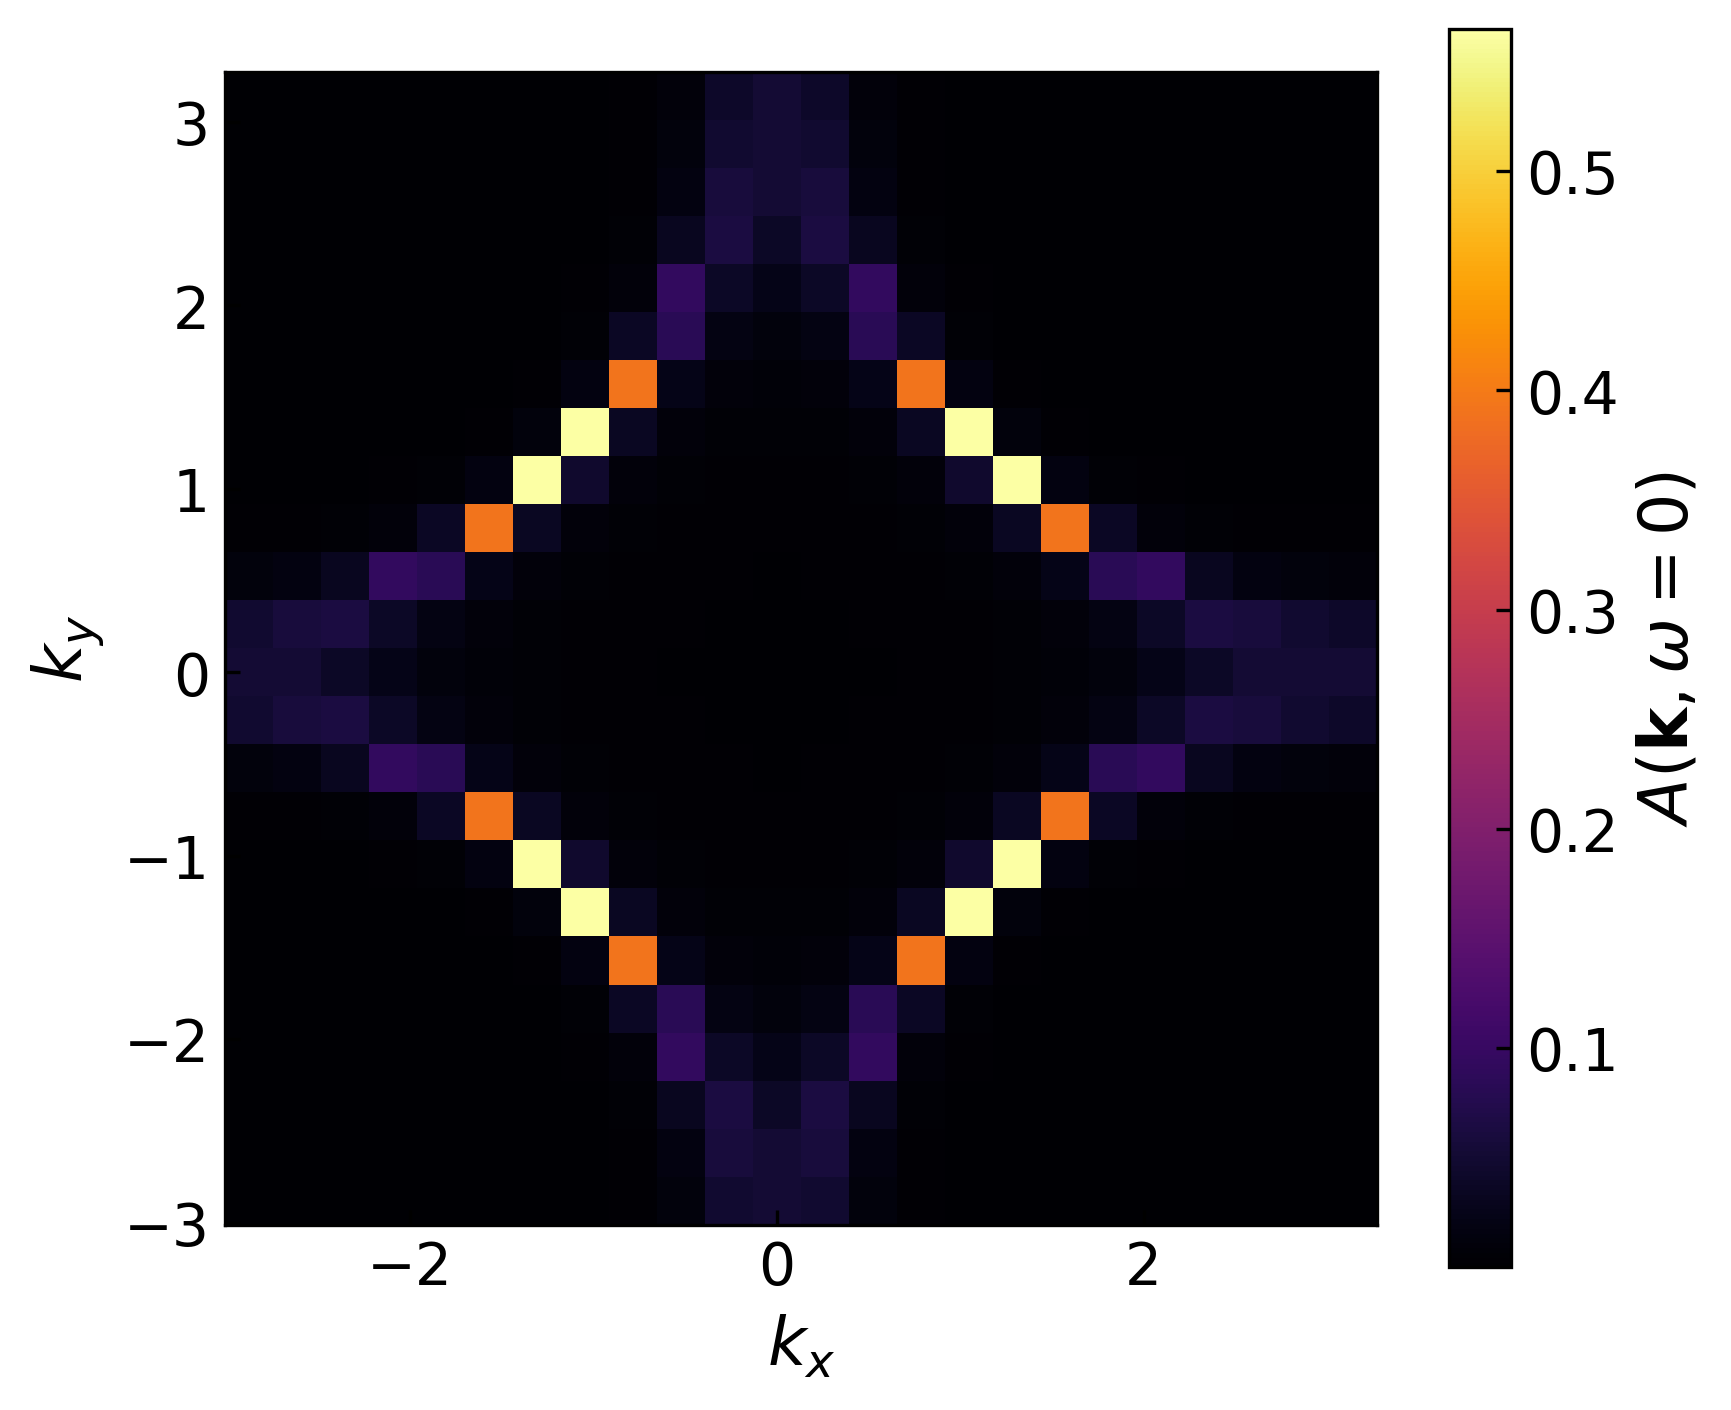

In [1018]:
# 3. Spectral Function A(k) Heatmap
ak_file = os.path.join(data_dir, "processed_ak0.csv")

df_ak = pd.read_csv(ak_file)

# 使用 pivot table 重塑数据
# index=ky (物理坐标), columns=kx (物理坐标), values=A_val
# 这样我们可以直接拿到用于绘图的物理坐标轴
pivot_table = df_ak.pivot(index='ky', columns='kx', values='A_val')

# 确保按数值排序 (防止csv读取顺序乱掉)
pivot_table.sort_index(ascending=True, inplace=True) # y轴排序
pivot_table = pivot_table.reindex(sorted(pivot_table.columns), axis=1) # x轴排序

# 提取网格坐标
# kx_vals 和 ky_vals 是每个像素的中心坐标
kx_vals = pivot_table.columns.values.astype(float)
ky_vals = pivot_table.index.values.astype(float)
Z = pivot_table.values

# 生成网格矩阵 (Meshgrid)
# 这里的 X, Y 对应的是 Z 中每个点的中心位置
X, Y = np.meshgrid(kx_vals, ky_vals)

plt.figure(figsize=(6, 5), dpi=300)

# 关键修改：使用 pcolormesh + shading='nearest'
# rasterized=True 非常重要！防止保存为 PDF/SVG 时文件变得巨大且渲染缓慢
pcm = plt.pcolormesh(X, Y, Z, 
                        shading='nearest', 
                        cmap='inferno', 
                        rasterized=True)

cbar = plt.colorbar(pcm)
cbar.set_label(r'$A(\mathbf{k}, \omega=0)$')

plt.xlabel(r'$k_x$')
plt.ylabel(r'$k_y$')
# plt.title('Fermi Surface')

# 强制坐标范围为 [-pi, pi] (或者根据你的数据范围)
plt.axis('scaled') # 保证 x 和 y 轴比例一致 (正方形像素)
# plt.xlim(-np.pi, np.pi)
# plt.ylim(-np.pi, np.pi)

# 绘制布里渊区的高对称线 (可选)
# 画个框或者十字线辅助参考
# plt.axhline(0, color='white', linestyle='--', linewidth=0.5, alpha=0.7)
# plt.axvline(0, color='white', linestyle='--', linewidth=0.5, alpha=0.7)

# 标注 (pi, 0) 和 (0, pi)
# plt.plot([np.pi, -np.pi], [0, 0], 'w+', markersize=5, alpha=0.5)
# plt.plot([0, 0], [np.pi, -np.pi], 'w+', markersize=5, alpha=0.5)

plt.tight_layout()
# plt.savefig(os.path.join(data_dir, "plot_fermi_surface.png"), dpi=300)
plt.show()
# print("  -> plot_fermi_surface.png saved (centered pixels).")